<a href="https://colab.research.google.com/github/123danghi/ML_Internship_Task-JTEKT-/blob/main/FBmarketplace_dataANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlation Matrix:
               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[1.13000000e+02 1.08951003e+02 2.47901695e+01 1.03412350e+02
  8.33551097e+00 5.78783637e-01 4.09706020e-01 1.82454503e-01
  7.82392285e-02]
 [4.86737226e+02 5.30959124e+03 4.80408759e+02 3.76072993e+02
  9.50729927e+01 4.80291971e+00 7.39416058e+00 2.51824818e+00
  8.75912409e-01]
 [1.71315289e+03 3.17871901e+02 1.17700413e+02 1.65226033e+03
  4.77747934e+01 9.73347107e+00 2.60950413e+00 4.13223140e-01
  3.61570248e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

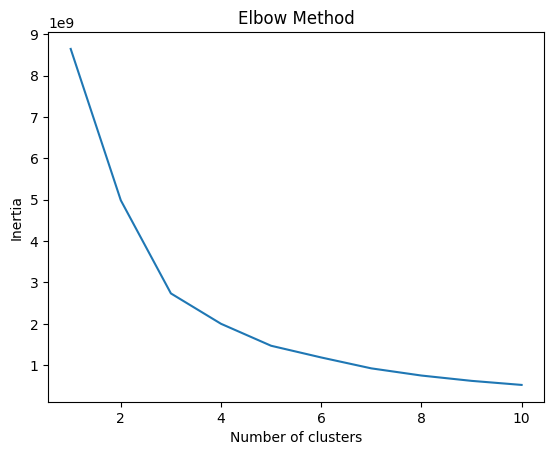

Count of Different Types of Posts:
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64
Average Values for Each Post Type:
             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/sample_data/Facebook_Marketplace_data.csv")

# Task 1 & 2: Correlation Analysis
correlation_matrix = data[['num_reactions', 'num_comments', 'num_shares']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Task 3: K-Means Clustering
X = data[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
kmeans = KMeans(n_clusters=3, random_state=42)  # you can adjust the number of clusters
kmeans.fit(X)
data['cluster'] = kmeans.labels_
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Task 4: Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Task 5: Count of different types of posts
post_counts = data['status_type'].value_counts()
print("Count of Different Types of Posts:")
print(post_counts)

# Task 6: Average values for each post type
avg_values = data.groupby('status_type').agg({'num_reactions': 'mean', 'num_comments': 'mean', 'num_shares': 'mean'})
print("Average Values for Each Post Type:")
print(avg_values)
